In [35]:
import os
from pathlib import Path

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

from src.data.config import RAW_DIR

cwd = Path.cwd()
RAW_DIR = cwd.parent / RAW_DIR

In [26]:
RAW_DIR

PosixPath('/home/philipp/Documents/Python-Projects/Data-Science/lol_data/data/raw')

In [29]:
files = [file.name for file in RAW_DIR.iterdir()]
files

['2023_LoL_esports_match_data_from_OraclesElixir.csv',
 '2014_LoL_esports_match_data_from_OraclesElixir.csv',
 '2017_LoL_esports_match_data_from_OraclesElixir.csv',
 '2015_LoL_esports_match_data_from_OraclesElixir.csv',
 '2018_LoL_esports_match_data_from_OraclesElixir.csv',
 '2021_LoL_esports_match_data_from_OraclesElixir.csv',
 '2020_LoL_esports_match_data_from_OraclesElixir.csv',
 '2022_LoL_esports_match_data_from_OraclesElixir.csv',
 '2016_LoL_esports_match_data_from_OraclesElixir.csv',
 '2019_LoL_esports_match_data_from_OraclesElixir.csv',
 '2024_LoL_esports_match_data_from_OraclesElixir.csv']

# Inspect a single .csv file of raw data

In [53]:
df = pd.read_csv(RAW_DIR / files[-1])
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,gpr,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,1,Blue,top,Zika,oe:player:65ed20b21e2993fb00dbd21a2fd991b,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,1,3,1,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,225.6204,0.169648,564.1463,NaN,14,0.4454,4,0.1273,5,24,0.7635,11083,6960,221.4210,0.237608,10784,NaN,NaN,279.0,256.0,23,16.0,0.0,8.8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,2,Blue,jng,Weiwei,oe:player:57da8dfcfbdb4e5b019fe93003db1c4,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Maokai,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,0,4,3,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7361,234.1782,0.176101,847.4761,NaN,10,0.3181,12,0.3818,10,39,1.2407,8636,4513,143.5737,0.154069,8840,NaN,NaN,153.0,14.0,139,111.0,3.0,4.8674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,3,Blue,mid,Scout,oe:player:71e79ef80600d398d90cfebe3b0b758,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Orianna,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,0,2,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10005,318.2927,0.239355,432.2163,NaN,4,0.1273,8,0.2545,2,31,0.9862,10743,6620,210.6045,0.226000,10594,NaN,NaN,270.0,269.0,1,1.0,0.0,8.5896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,4,Blue,bot,GALA,oe:player:867e8957fae1cb59f0808dbcc3aada2,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Kalista,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,2,4,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,Na

In [55]:
all_games = df['gameid'].unique()
all_games

array(['10660-10660_game_1', '10660-10660_game_2', '10660-10660_game_3',
       ..., '11004-11004_game_3', '11051-11051_game_4',
       '11051-11051_game_5'], dtype=object)

In [59]:
df.loc[df['datacompleteness'] == 'partial']

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,gpr,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,1,Blue,top,Zika,oe:player:65ed20b21e2993fb00dbd21a2fd991b,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,1,3,1,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,225.6204,0.169648,564.1463,NaN,14,0.4454,4,0.1273,5,24,0.7635,11083,6960,221.4210,0.237608,10784,NaN,NaN,279.0,256.0,23,16.0,0.0,8.8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,2,Blue,jng,Weiwei,oe:player:57da8dfcfbdb4e5b019fe93003db1c4,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Maokai,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,0,4,3,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7361,234.1782,0.176101,847.4761,NaN,10,0.3181,12,0.3818,10,39,1.2407,8636,4513,143.5737,0.154069,8840,NaN,NaN,153.0,14.0,139,111.0,3.0,4.8674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,3,Blue,mid,Scout,oe:player:71e79ef80600d398d90cfebe3b0b758,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Orianna,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,0,2,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10005,318.2927,0.239355,432.2163,NaN,4,0.1273,8,0.2545,2,31,0.9862,10743,6620,210.6045,0.226000,10594,NaN,NaN,270.0,269.0,1,1.0,0.0,8.5896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,4,Blue,bot,GALA,oe:player:867e8957fae1cb59f0808dbcc3aada2,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Kalista,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,2,4,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,Na

In [64]:
partial_games = df.loc[df['datacompleteness'] == 'partial']
complete_games = df.loc[~(df['datacompleteness'] == 'partial')]

In [68]:
partial_games.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,gpr,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,1,Blue,top,Zika,oe:player:65ed20b21e2993fb00dbd21a2fd991b,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,1,3,1,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,225.6204,0.169648,564.1463,NaN,14,0.4454,4,0.1273,5,24,0.7635,11083,6960,221.4210,0.237608,10784,NaN,NaN,279.0,256.0,23,16.0,0.0,8.8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,2,Blue,jng,Weiwei,oe:player:57da8dfcfbdb4e5b019fe93003db1c4,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Maokai,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,0,4,3,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7361,234.1782,0.176101,847.4761,NaN,10,0.3181,12,0.3818,10,39,1.2407,8636,4513,143.5737,0.154069,8840,NaN,NaN,153.0,14.0,139,111.0,3.0,4.8674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,3,Blue,mid,Scout,oe:player:71e79ef80600d398d90cfebe3b0b758,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Orianna,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,0,2,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10005,318.2927,0.239355,432.2163,NaN,4,0.1273,8,0.2545,2,31,0.9862,10743,6620,210.6045,0.226000,10594,NaN,NaN,270.0,269.0,1,1.0,0.0,8.5896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,4,Blue,bot,GALA,oe:player:867e8957fae1cb59f0808dbcc3aada2,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Kalista,Akali,Nocturne,K'Sante,Lee Sin,Wukong,NaN,NaN,NaN,NaN,NaN,1886,0,2,4,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,Na

In [67]:
complete_games.head(12)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,gpr,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
216,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,1,Blue,top,Adam,oe:player:6a9abcfebed9c636ca90560b7f49855,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Renekton,Draven,Bel'Veth,LeBlanc,Jax,Poppy,NaN,NaN,NaN,NaN,NaN,1749,0,3,3,3,10,14,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3431,0.8233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,10063,345.2144,0.286116,1001.6467,694.2710,12,0.4117,1,0.0343,8,20,0.6861,12202,8358,286.7238,0.257673,12250,NaN,NaN,232.0,228.0,4,NaN,NaN,7.9588,4716.0,5143.0,95.0,3119.0,4471.0,82.0,1597.0,672.0,13.0,2.0,1.0,0.0,0.0,0.0,2.0,7046.0,7346.0,134.0,5356.0,7692.0,135.0,1690.0,-346.0,-1.0,2.0,1.0,1.0,0.0,1.0,2.0
217,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,2,Blue,jng,Sheo,oe:player:404079b4e478ea2a8b57904c640311b,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Nocturne,Draven,Bel'Veth,LeBlanc,Jax,Poppy,NaN,NaN,NaN,NaN,NaN,1749,0,2,2,2,10,14,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.3431,0.8233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4562,156.5009,0.129709,949.7770,690.3602,11,0.3774,9,0.3087,8,41,1.4065,9892,6048,207.4786,0.186460,9650,NaN,NaN,213.0,16.0,197,NaN,NaN,7.3070,3617.0,3590.0,69.0,3644.0,3321.0,65.0,-27.0,269.0,4.0,1.0,1.0,0.0,1.0,2.0,0.0,5162.0,5298.0,98.0,5540.0,5224.0,95.0,-378.0,74.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0
218,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,3,Blue,mid,nuc,oe:player:8f862245fbdb4d065e46c83630b9495,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Akali,Draven,Bel'Veth,LeBlanc,Jax,Poppy,NaN,NaN,NaN,NaN,NaN,1749,0,2,3,1,10,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3431,0.8233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11408,391.3551,0.324358,635.8834,402.9846,8,0.2744,2,0.0686,4,22,0.7547,10279,6435,220.7547,0.198391,10000,NaN,NaN,224.0,220.0,4,NaN,NaN,7.6844,3208.0,4646.0,80.0,3753.0,5005.0,101.0,-545.0,-359.0,-21.0,0.0,0.0,0.0,0.0,0.0,0.0,5823.0,7519.0,136.0,5544.0,7849.0,152.0,279.0,-330.0,-16.0,1.0,0.0,0.0,0.0,1.0,0.0
219,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,4,Blue,bot,Ice,oe:player:8bac58409e91b96ecd05f6d8f053e07,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Kalista,Draven,Bel'Veth,LeBlanc,Jax,Poppy,NaN,NaN,NaN,NaN,NaN,1749,0,2,2,2,10,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3431,0.8233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### We inspect the (in)completeness of the data

<Axes: xlabel='datacompleteness'>

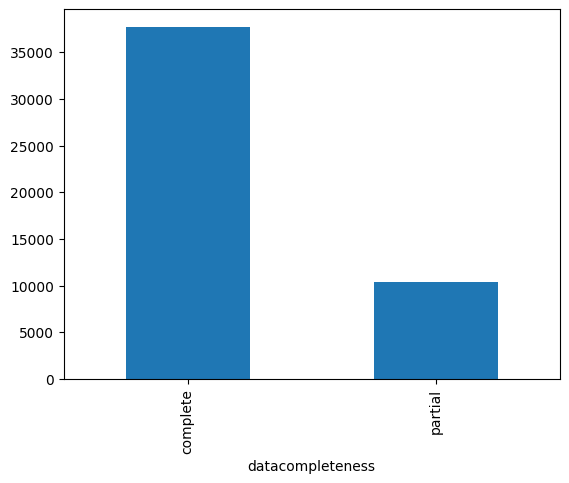

In [84]:
df['datacompleteness'].value_counts().plot(kind='bar')

In [85]:
partial_games['league'].unique()

array(['DCup', 'LPL', 'LDL', 'MSI'], dtype=object)

Partial data comes from the Chinese leagues.

In [86]:
complete_games['league'].unique()

array(['LEC', 'LCKC', 'LCO', 'UL', 'LLA', 'LCK', 'PRM', 'LVP SL', 'LFL',
       'PCS', 'LJL', 'VCS', 'CBLOL', 'LCS', 'NACL', 'HM', 'GLL', 'ESLOL',
       'NLC', 'TCL', 'LIT', 'LPLOL', 'EBL', 'CBLOLA', 'AL', 'HC', 'LFL2',
       'NEXO', 'LRN', 'LRS', 'EM'], dtype=object)

Let's look at the mean number of missing values for partial and complete data:

In [91]:
partial_games.isna().sum(axis=1).mean()

77.90239197530865

In [89]:
complete_games.isna().sum(axis=1).mean()

33.10523385300668

<Axes: >

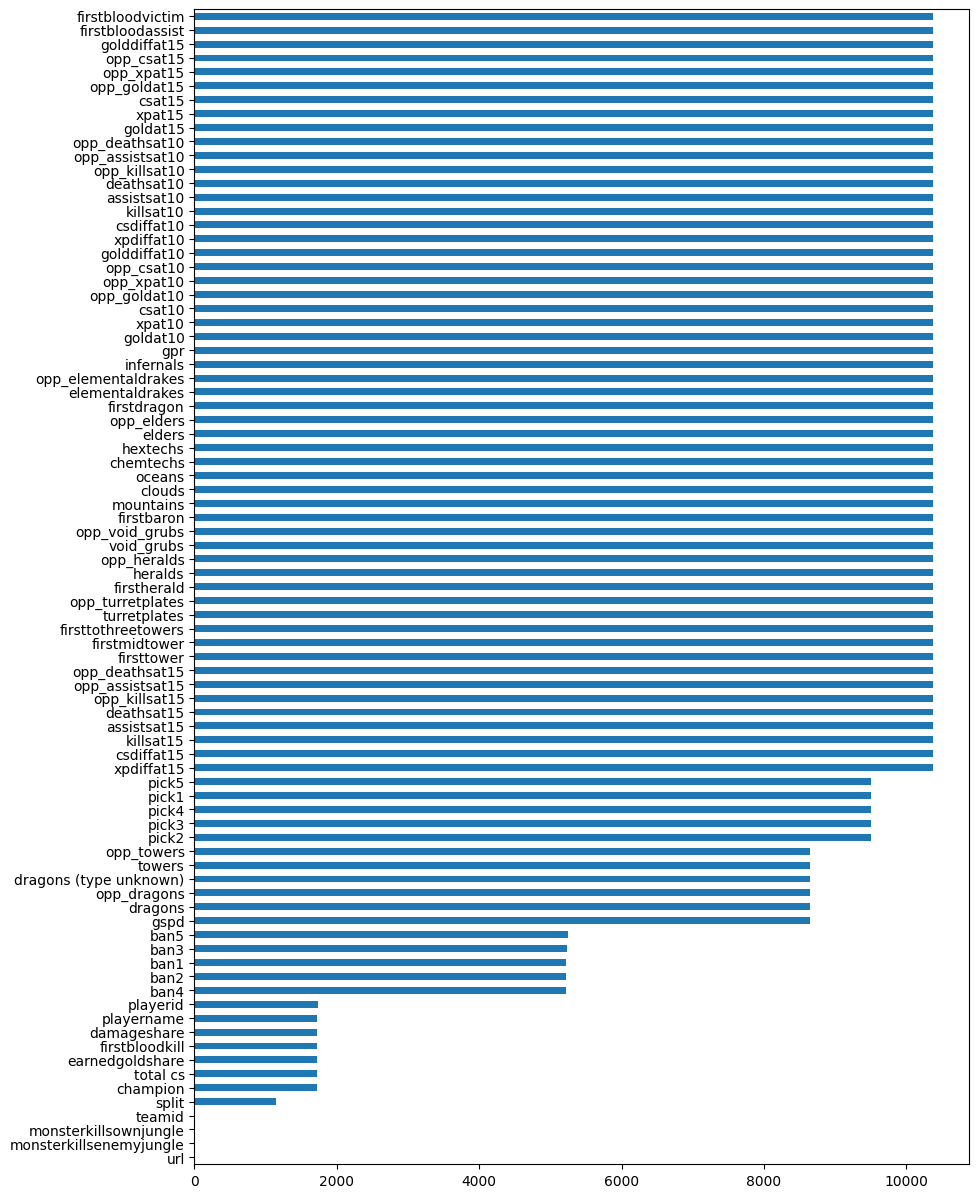

In [139]:
partial_games.isna().sum().sort_values().loc[(data!=0)].plot(kind='barh', figsize=(10,15))

<Axes: >

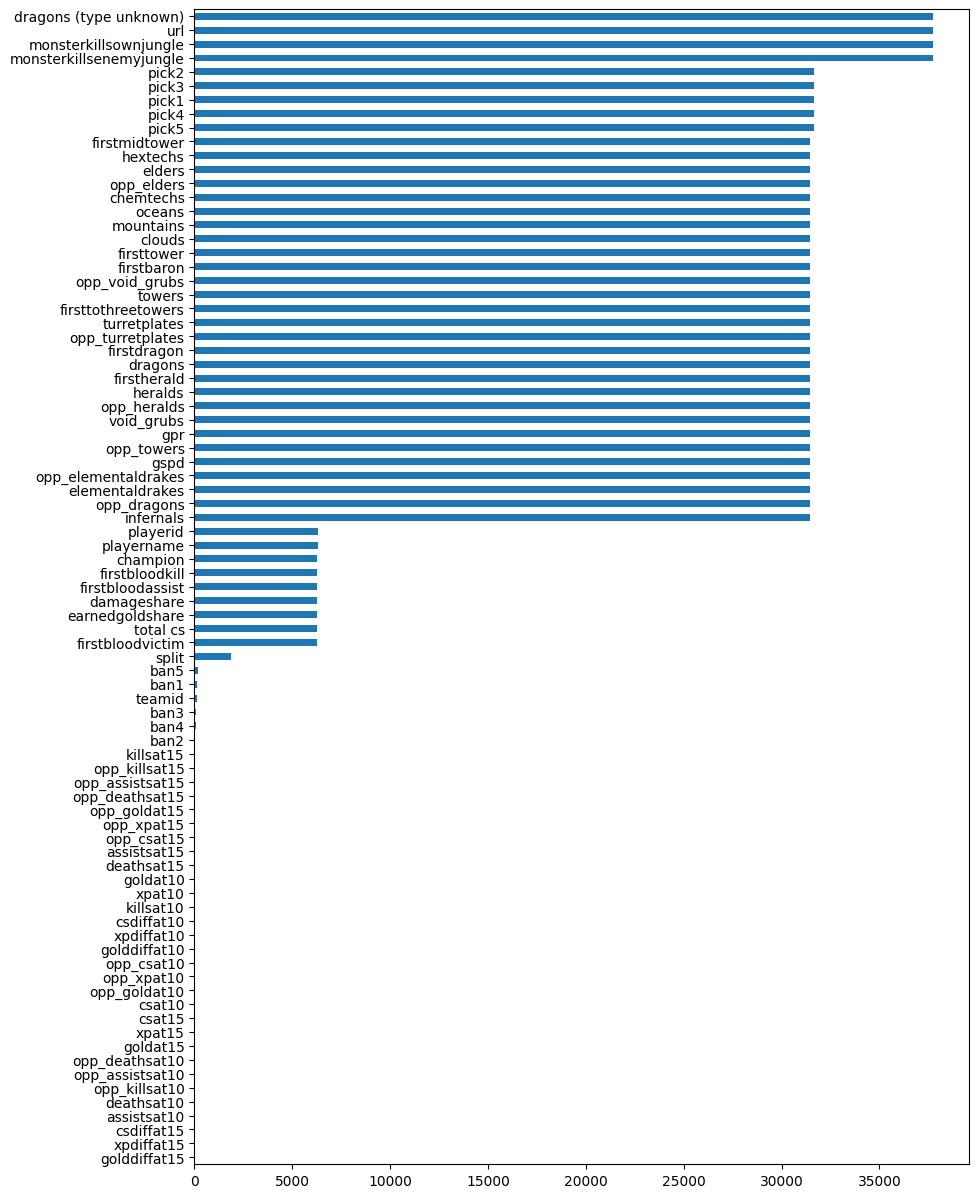

In [138]:
complete_games.isna().sum().sort_values().loc[(data!=0)].plot(kind='barh', figsize=(10,15))